In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000740971"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000740971
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,OLD POINT FINANCIAL CORP
Ticker,OPOF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
interest income,57.0,9.848667e+06,3.984933e+06,3000.0,7725000.0,9365000.0,10472000.0,24990000.0
net income,56.0,1.436446e+06,1.369638e+06,-2889000.0,933250.0,1131000.0,1943250.0,6492000.0
net interest income,57.0,7.439842e+06,2.313783e+06,5774000.0,6435000.0,6803000.0,7520000.0,18195000.0
provision for loan losses,57.0,6.968772e+05,7.761091e+05,-100000.0,300000.0,350000.0,1000000.0,4700000.0


# Plots

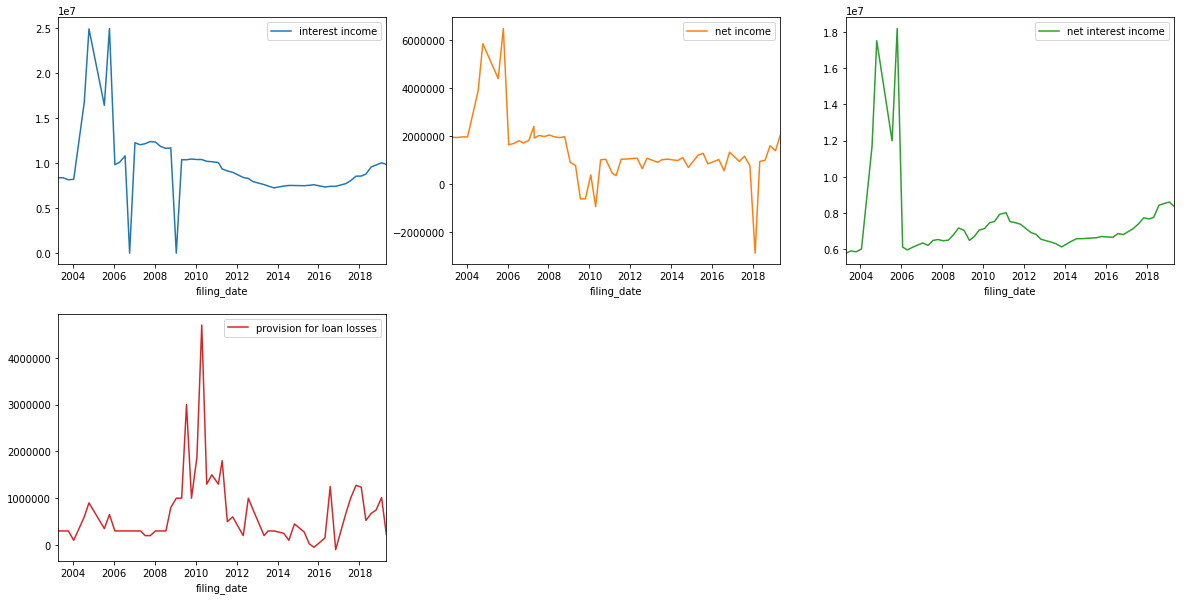

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0000740971 book value per share                              None    empty   
           interest income                                 2004Q1  missing   
           interest income            2004Q4 to 2005Q1: 2 periods  missing   
           interest income                                 2011Q4  missing   
           interest income                                 2012Q4  missing   
           interest income                                 2013Q4  missing   
           interest income                                 2014Q4  missing   
           interest income                                 2015Q4  missing   
           interest income                                 2016Q4  missing   
           net income                                      2004Q1  missing   
           net income                 2004Q4 to 2005Q1: 2 periods  missing   
           net income                                      2009Q3  missing   
           net income                                      2011Q4  missing   
           net income                                      2012Q4  missing   
           net income                                      2013Q4  missing   
           net income                                      2014Q4  missing   
           net income                                      2015Q4  missing   
           net income                                      2016Q4  missing   
           net interest income                             2004Q1  missing   
           net interest income        2004Q4 to 2005Q1: 2 periods  missing   
           net interest income                             2011Q4  missing   
           net interest income                             2012Q4  missing   
           net interest income                             2013Q4  missing   
           net interest income                             2014Q4  missing   
           net interest income                             2015Q4  missing   
           net interest income                             2016Q4  missing   
           provision for loan losses                       2004Q1  missing   
           provision for loan losses  2004Q4 to 2005Q1: 2 periods  missing   
           provision for loan losses                       2011Q4  missing   
           provision for loan losses                       2012Q4  missing   
           provision for loan losses                       2013Q4  missing   
           provision for loan losses                       2014Q4  missing   
           provision for loan losses                       2015Q4  missing   
           provision for loan losses                       2016Q4  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0000740971 book value per share       No values for item  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing p

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()